## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [10]:
import os
import keras
import itertools

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                4160      
_________________________________________________________________
output (Dense)               (None, 10)                650 

In [8]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [0.001, 0.01]
MOMENTUM = [0.0, 0.2, 0.4, 0.6, 0.8]
EPOCHS = 20
BATCH_SIZE = 256

In [14]:
results = {}
for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    keras.backend.clear_session()
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    # model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.001000, Momentum = 0.00
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 31us/step - loss: 2.2689 - acc: 0.1619 - val_loss: 2.2487 - val_acc: 0.1868
Epoch 2/20
50000/50000 [==============================] - 1s 29us/step - loss: 2.2272 - acc: 0.1993 - val_loss: 2.2075 - val_acc: 0.2087
Epoch 3/20
50000/50000 [==============================] - 1s 29us/step - loss: 2.1878 - acc: 0.2148 - val_loss: 2.1698 - val_acc: 0.2237
Epoch 4/20
50000/50000 [==============================] - 1s 29us/step - loss: 2.1511 - acc: 0.2308 - val_loss: 2.1350 - val_acc: 0.2370
Epoch 5/20
50000/50000 [==============================] - 1s 29us/step - loss: 2.1178 - acc: 0.2504 - val_loss: 2.1035 - val_acc: 0.2594
Epoch 6/20
50000/50000 [==============================] - 1s 29us/step - loss: 2.0867 - acc: 0.2626 - val_loss: 2.0741 - val_acc: 0.2712
Epoch 7/20
50000/50000 [==============================] - 1s 29us/step - loss: 2.

50000/50000 [==============================] - 1s 30us/step - loss: 1.7991 - acc: 0.3643 - val_loss: 1.7963 - val_acc: 0.3646
Epoch 19/20
50000/50000 [==============================] - 1s 29us/step - loss: 1.7882 - acc: 0.3691 - val_loss: 1.7871 - val_acc: 0.3673
Epoch 20/20
50000/50000 [==============================] - 1s 29us/step - loss: 1.7784 - acc: 0.3715 - val_loss: 1.7772 - val_acc: 0.3719
Experiment with LR = 0.001000, Momentum = 0.60
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 32us/step - loss: 2.2772 - acc: 0.1533 - val_loss: 2.2317 - val_acc: 0.1827
Epoch 2/20
50000/50000 [==============================] - 1s 30us/step - loss: 2.1910 - acc: 0.2059 - val_loss: 2.1485 - val_acc: 0.2254
Epoch 3/20
50000/50000 [==============================] - 1s 29us/step - loss: 2.1061 - acc: 0.2510 - val_loss: 2.0628 - val_acc: 0.2626
Epoch 4/20
50000/50000 [==============================] - 1s 30us/step - loss: 2.0250 - ac

50000/50000 [==============================] - 2s 31us/step - loss: 1.5505 - acc: 0.4450 - val_loss: 1.6789 - val_acc: 0.4113
Epoch 16/20
50000/50000 [==============================] - 2s 31us/step - loss: 1.5351 - acc: 0.4537 - val_loss: 1.5284 - val_acc: 0.4533
Epoch 17/20
50000/50000 [==============================] - 2s 31us/step - loss: 1.5170 - acc: 0.4615 - val_loss: 1.6752 - val_acc: 0.4135
Epoch 18/20
50000/50000 [==============================] - 2s 31us/step - loss: 1.5053 - acc: 0.4653 - val_loss: 1.6118 - val_acc: 0.4199
Epoch 19/20
50000/50000 [==============================] - 2s 31us/step - loss: 1.4906 - acc: 0.4682 - val_loss: 1.5337 - val_acc: 0.4527
Epoch 20/20
50000/50000 [==============================] - 2s 31us/step - loss: 1.4771 - acc: 0.4756 - val_loss: 1.5636 - val_acc: 0.4304
Experiment with LR = 0.010000, Momentum = 0.20
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 33us/step - loss: 2.1383 -

50000/50000 [==============================] - 1s 30us/step - loss: 1.4360 - acc: 0.4917 - val_loss: 1.4653 - val_acc: 0.4742
Epoch 13/20
50000/50000 [==============================] - 1s 30us/step - loss: 1.4122 - acc: 0.4994 - val_loss: 1.5501 - val_acc: 0.4510
Epoch 14/20
50000/50000 [==============================] - 2s 30us/step - loss: 1.3965 - acc: 0.5034 - val_loss: 1.4905 - val_acc: 0.4740
Epoch 15/20
50000/50000 [==============================] - 2s 30us/step - loss: 1.3749 - acc: 0.5110 - val_loss: 1.4592 - val_acc: 0.4746
Epoch 16/20
50000/50000 [==============================] - 2s 30us/step - loss: 1.3521 - acc: 0.5192 - val_loss: 1.4533 - val_acc: 0.4856
Epoch 17/20
50000/50000 [==============================] - 2s 30us/step - loss: 1.3415 - acc: 0.5212 - val_loss: 1.5719 - val_acc: 0.4248
Epoch 18/20
50000/50000 [==============================] - 2s 30us/step - loss: 1.3230 - acc: 0.5294 - val_loss: 1.5898 - val_acc: 0.4361
Epoch 19/20
50000/50000 [=====================

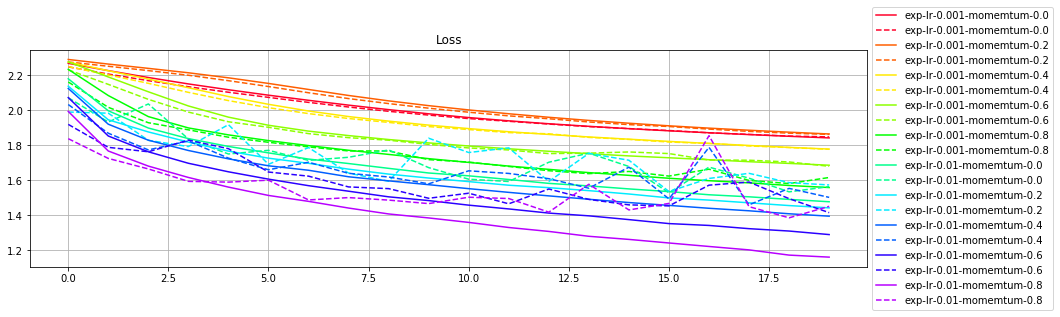

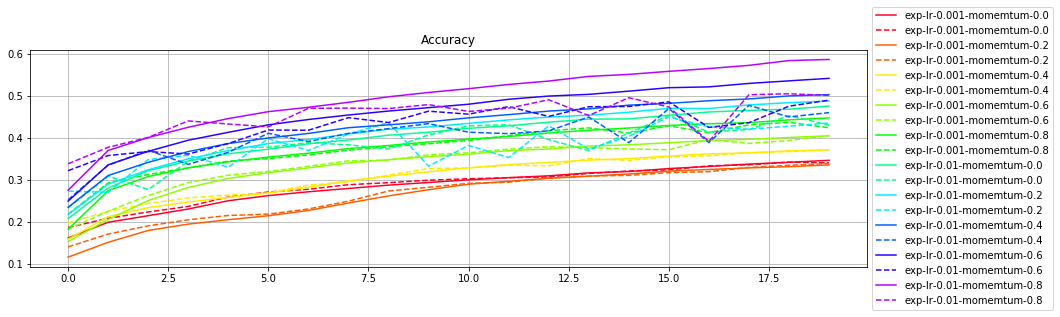

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(15, 4))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss (with nesterov)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

plt.figure(figsize=(15, 4))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy (with nesterov)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

In [18]:
results = {}
for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    keras.backend.clear_session()
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    # model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True, 
              verbose=0)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.001000, Momentum = 0.00
Experiment with LR = 0.001000, Momentum = 0.20
Experiment with LR = 0.001000, Momentum = 0.40
Experiment with LR = 0.001000, Momentum = 0.60
Experiment with LR = 0.001000, Momentum = 0.80
Experiment with LR = 0.010000, Momentum = 0.00
Experiment with LR = 0.010000, Momentum = 0.20
Experiment with LR = 0.010000, Momentum = 0.40
Experiment with LR = 0.010000, Momentum = 0.60
Experiment with LR = 0.010000, Momentum = 0.80


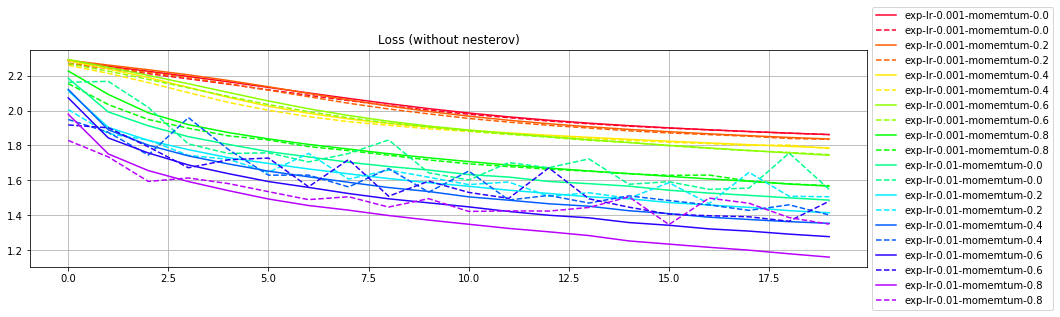

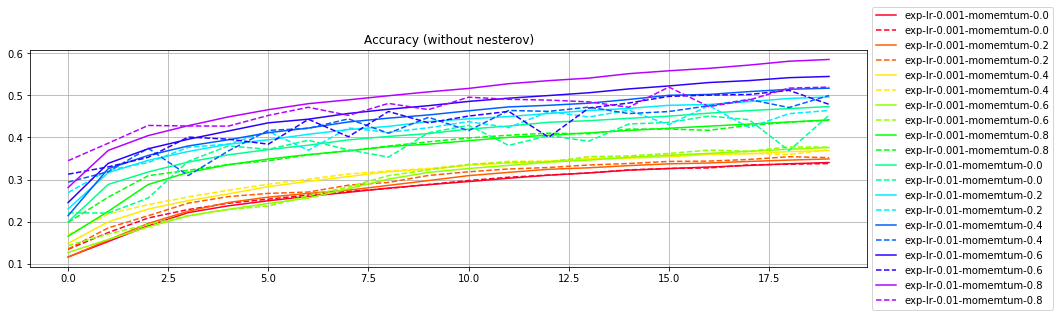

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(15, 4))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss (without nesterov)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

plt.figure(figsize=(15, 4))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy (without nesterov)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()